## Zukhra Mazhitova


I was born and currently live in Atyrau. Therefore, I have decided to scrap apartments for sale from my city.

In [157]:
import pandas as pd
import requests
import numpy as np
import re
from bs4 import BeautifulSoup

from time import sleep
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


In [83]:
url='https://krisha.kz/prodazha/kvartiry/atyrau/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
link=[]
for a in soup.find_all('a', class_="paginator__btn"):
    link.append(a['href'])
link=link[:5]
print(link)


['/prodazha/kvartiry/atyrau/', '/prodazha/kvartiry/atyrau/?page=2', '/prodazha/kvartiry/atyrau/?page=3', '/prodazha/kvartiry/atyrau/?page=4', '/prodazha/kvartiry/atyrau/?page=5']


In [4]:
items=[]
for i in range(0,len(link)):
    url='https://krisha.kz' + str(link[i])
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for a in soup.find_all('a', class_="a-card__title"):
        items.append(a['href'])


In [165]:
titles=[]
prices=[]
cities=[]
houses=[]
owners=[]
for i in range(0,len(items)):
    url='https://krisha.kz' + str(items[i])
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    title=soup.find('h1').text.strip()
    titles.append(title)
    price=soup.find('div',class_="offer__price").text.strip()
    prices.append(price)
    city=soup.find('div',class_="offer__location offer__advert-short-info").find('span').text.strip()
    cities.append(city)
    house=soup.find('div',class_="offer__advert-short-info").text.strip()
    houses.append(house)
    owner=soup.find('div',class_="owners__name").text.strip()
    owners.append(owner)
    
    

In [166]:
print(len(titles))
print(len(prices))
print(len(cities))
print(len(houses))
print(len(owners))


100
100
100
100
100


In [23]:
numbers=[]

for i in range(0,len(items)):
    url='https://krisha.kz' + str(items[i])
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument('--no-sandbox')
    driver = webdriver.Chrome(options=chrome_options,executable_path=r"C:/Users/ASUS/Downloads/chromedriver.exe")
    driver.get(url)
    link = driver.find_element_by_id('tm-telephone-body')
    link.click() 
    sleep(0.5) 
    number = driver.find_element_by_class_name('offer__contacts-phones').text.strip()
    driver.quit() 
    numbers.append(number)

In [167]:
aparts = pd.DataFrame({'title': titles,
'price': prices,
'city': cities,
'house': house,
'number': numbers,
'owner': owners
})
print(aparts.info())
aparts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   100 non-null    object
 1   price   100 non-null    object
 2   city    100 non-null    object
 3   house   100 non-null    object
 4   number  100 non-null    object
 5   owner   100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None


,title,price,city,house,number,owner
0,"1-комнатная квартира, 43.46 м², Абылхаир хана ...",от 15 646 500 〒,"Атырау, Атырауская обл.","Атырау, мкр Нурсая\nпоказать на карте",+7 778 017 1149,Застройщик BI Group
1,"2-комнатная квартира, 65.53 м², Абылхаир хана ...",от 22 167 108 〒,"Атырау, Атырауская обл.","Атырау, мкр Нурсая\nпоказать на карте",+7 778 017 1149,Застройщик BI Group
2,"1-комнатная квартира, 56.9 м², Авангард 2 микр...",от 15 932 000 〒,"Атырау, Атырауская обл.","Атырау, мкр Нурсая\nпоказать на карте",+7 778 017 1133,"Застройщик TOO ""ORKALI"""
3,"4-комнатная квартира, 120 м², 2/9 этаж, Жарбос...",44 000 000 〒,"Атырау, Атырауская обл.","Атырау, мкр Нурсая\nпоказать на карте",+7 777 311 7000,Хозяин недвижимости
4,"4-комнатная квартира, 136.5 м², 2-ая Береговая...",от 43 680 000 〒,"Атырау, Атырауская обл.","Атырау, мкр Нурсая\nпоказать на карте",+7 778 017 1153,"Застройщик TOO ""ORKALI"""
...,...,...,...,...,...,...
95,"2-комнатная квартира, 65.78 м², 8/10 этаж, мкр...",15 935 205 〒,"Атырау, мкр Нурсая","Атырау, мкр Нурсая\nпоказать на карте",+7 778 256 1865,Кадирбаева Айзада Туралбековна
96,"3-комнатная квартира, 98.66 м², 8/10 этаж, мкр...",23 900 385 〒,"Атырау, мкр Нурсая","Атырау, мкр Нурсая\nпоказать на карте",+7 778 256 1865,Кадирбаева Айзада Туралбековна
97,"2-комнатная квартира, 62.2 м², 6/9 этаж, мкр Н...",30 000 000 〒,"Атырау, мкр Нурсая","Атырау, мкр Нурсая\nпоказать на карте",+7 778 788 8711,Хозяин недвижимости
98,"2-комнатная квартира, 60 м², 3/5 этаж, Жилгоро...",16 000 000 〒,"Атырау, Жилгородок","Атырау, мкр Нурсая\nпоказать на карте",+7 701 530 6730,Хозяин недвижимости


In [168]:
aparts[['city','district']] = aparts.city.str.split(",",expand=True)
aparts

,title,price,city,house,number,owner,district
0,"1-комнатная квартира, 43.46 м², Абылхаир хана ...",от 15 646 500 〒,Атырау,"Атырау, мкр Нурсая\nпоказать на карте",+7 778 017 1149,Застройщик BI Group,Атырауская обл.
1,"2-комнатная квартира, 65.53 м², Абылхаир хана ...",от 22 167 108 〒,Атырау,"Атырау, мкр Нурсая\nпоказать на карте",+7 778 017 1149,Застройщик BI Group,Атырауская обл.
2,"1-комнатная квартира, 56.9 м², Авангард 2 микр...",от 15 932 000 〒,Атырау,"Атырау, мкр Нурсая\nпоказать на карте",+7 778 017 1133,"Застройщик TOO ""ORKALI""",Атырауская обл.
3,"4-комнатная квартира, 120 м², 2/9 этаж, Жарбос...",44 000 000 〒,Атырау,"Атырау, мкр Нурсая\nпоказать на карте",+7 777 311 7000,Хозяин недвижимости,Атырауская обл.
4,"4-комнатная квартира, 136.5 м², 2-ая Береговая...",от 43 680 000 〒,Атырау,"Атырау, мкр Нурсая\nпоказать на карте",+7 778 017 1153,"Застройщик TOO ""ORKALI""",Атырауская обл.
...,...,...,...,...,...,...,...
95,"2-комнатная квартира, 65.78 м², 8/10 этаж, мкр...",15 935 205 〒,Атырау,"Атырау, мкр Нурсая\nпоказать на карте",+7 778 256 1865,Кадирбаева Айзада Туралбековна,мкр Нурсая
96,"3-комнатная квартира, 98.66 м², 8/10 этаж, мкр...",23 900 385 〒,Атырау,"Атырау, мкр Нурсая\nпоказать на карте",+7 778 256 1865,Кадирбаева Айзада Туралбековна,мкр Нурсая
97,"2-комнатная квартира, 62.2 м², 6/9 этаж, мкр Н...",30 000 000 〒,Атырау,"Атырау, мкр Нурсая\nпоказать на карте",+7 778 788 8711,Хозяин недвижимости,мкр Нурсая
98,"2-комнатная квартира, 60 м², 3/5 этаж, Жилгоро...",16 000 000 〒,Атырау,"Атырау, мкр Нурсая\nпоказать на карте",+7 701 530 6730,Хозяин недвижимости,Жилгородок


In [169]:
aparts.drop(columns=['house'],inplace=True)

In [170]:

aparts['square'] = aparts['title'].str.split(',').str[1]
aparts['addresss'] = aparts['title'].str.split(',').str[-1]
aparts

,title,price,city,number,owner,district,square,addresss
0,"1-комнатная квартира, 43.46 м², Абылхаир хана ...",от 15 646 500 〒,Атырау,+7 778 017 1149,Застройщик BI Group,Атырауская обл.,43.46 м²,Абылхаир хана — Жумагалиева
1,"2-комнатная квартира, 65.53 м², Абылхаир хана ...",от 22 167 108 〒,Атырау,+7 778 017 1149,Застройщик BI Group,Атырауская обл.,65.53 м²,Абылхаир хана — Жумагалиева
2,"1-комнатная квартира, 56.9 м², Авангард 2 микр...",от 15 932 000 〒,Атырау,+7 778 017 1133,"Застройщик TOO ""ORKALI""",Атырауская обл.,56.9 м²,Авангард 2 микрорайон 6А
3,"4-комнатная квартира, 120 м², 2/9 этаж, Жарбос...",44 000 000 〒,Атырау,+7 777 311 7000,Хозяин недвижимости,Атырауская обл.,120 м²,Жарбосынова 62
4,"4-комнатная квартира, 136.5 м², 2-ая Береговая...",от 43 680 000 〒,Атырау,+7 778 017 1153,"Застройщик TOO ""ORKALI""",Атырауская обл.,136.5 м²,2-ая Береговая линия
...,...,...,...,...,...,...,...,...
95,"2-комнатная квартира, 65.78 м², 8/10 этаж, мкр...",15 935 205 〒,Атырау,+7 778 256 1865,Кадирбаева Айзада Туралбековна,мкр Нурсая,65.78 м²,Абулхайыр хана 51а
96,"3-комнатная квартира, 98.66 м², 8/10 этаж, мкр...",23 900 385 〒,Атырау,+7 778 256 1865,Кадирбаева Айзада Туралбековна,мкр Нурсая,98.66 м²,Абулхайыр хана 51а
97,"2-комнатная квартира, 62.2 м², 6/9 этаж, мкр Н...",30 000 000 〒,Атырау,+7 778 788 8711,Хозяин недвижимости,мкр Нурсая,62.2 м²,Абылқайыр Хан 70/2
98,"2-комнатная квартира, 60 м², 3/5 этаж, Жилгоро...",16 000 000 〒,Атырау,+7 701 530 6730,Хозяин недвижимости,Жилгородок,60 м²,Жилгородок 50


In [171]:
aparts['price']=aparts['price'].str.strip('от ')
aparts

,title,price,city,number,owner,district,square,addresss
0,"1-комнатная квартира, 43.46 м², Абылхаир хана ...",15 646 500 〒,Атырау,+7 778 017 1149,Застройщик BI Group,Атырауская обл.,43.46 м²,Абылхаир хана — Жумагалиева
1,"2-комнатная квартира, 65.53 м², Абылхаир хана ...",22 167 108 〒,Атырау,+7 778 017 1149,Застройщик BI Group,Атырауская обл.,65.53 м²,Абылхаир хана — Жумагалиева
2,"1-комнатная квартира, 56.9 м², Авангард 2 микр...",15 932 000 〒,Атырау,+7 778 017 1133,"Застройщик TOO ""ORKALI""",Атырауская обл.,56.9 м²,Авангард 2 микрорайон 6А
3,"4-комнатная квартира, 120 м², 2/9 этаж, Жарбос...",44 000 000 〒,Атырау,+7 777 311 7000,Хозяин недвижимости,Атырауская обл.,120 м²,Жарбосынова 62
4,"4-комнатная квартира, 136.5 м², 2-ая Береговая...",43 680 000 〒,Атырау,+7 778 017 1153,"Застройщик TOO ""ORKALI""",Атырауская обл.,136.5 м²,2-ая Береговая линия
...,...,...,...,...,...,...,...,...
95,"2-комнатная квартира, 65.78 м², 8/10 этаж, мкр...",15 935 205 〒,Атырау,+7 778 256 1865,Кадирбаева Айзада Туралбековна,мкр Нурсая,65.78 м²,Абулхайыр хана 51а
96,"3-комнатная квартира, 98.66 м², 8/10 этаж, мкр...",23 900 385 〒,Атырау,+7 778 256 1865,Кадирбаева Айзада Туралбековна,мкр Нурсая,98.66 м²,Абулхайыр хана 51а
97,"2-комнатная квартира, 62.2 м², 6/9 этаж, мкр Н...",30 000 000 〒,Атырау,+7 778 788 8711,Хозяин недвижимости,мкр Нурсая,62.2 м²,Абылқайыр Хан 70/2
98,"2-комнатная квартира, 60 м², 3/5 этаж, Жилгоро...",16 000 000 〒,Атырау,+7 701 530 6730,Хозяин недвижимости,Жилгородок,60 м²,Жилгородок 50


In [174]:
aparts.to_excel(r'aparts2.xlsx')

In [175]:
#column for number of rooms
aparts['room']=aparts.title.str[0]
aparts

,title,price,city,number,owner,district,square,addresss,room
0,"1-комнатная квартира, 43.46 м², Абылхаир хана ...",15 646 500 〒,Атырау,+7 778 017 1149,Застройщик BI Group,Атырауская обл.,43.46 м²,Абылхаир хана — Жумагалиева,1
1,"2-комнатная квартира, 65.53 м², Абылхаир хана ...",22 167 108 〒,Атырау,+7 778 017 1149,Застройщик BI Group,Атырауская обл.,65.53 м²,Абылхаир хана — Жумагалиева,2
2,"1-комнатная квартира, 56.9 м², Авангард 2 микр...",15 932 000 〒,Атырау,+7 778 017 1133,"Застройщик TOO ""ORKALI""",Атырауская обл.,56.9 м²,Авангард 2 микрорайон 6А,1
3,"4-комнатная квартира, 120 м², 2/9 этаж, Жарбос...",44 000 000 〒,Атырау,+7 777 311 7000,Хозяин недвижимости,Атырауская обл.,120 м²,Жарбосынова 62,4
4,"4-комнатная квартира, 136.5 м², 2-ая Береговая...",43 680 000 〒,Атырау,+7 778 017 1153,"Застройщик TOO ""ORKALI""",Атырауская обл.,136.5 м²,2-ая Береговая линия,4
...,...,...,...,...,...,...,...,...,...
95,"2-комнатная квартира, 65.78 м², 8/10 этаж, мкр...",15 935 205 〒,Атырау,+7 778 256 1865,Кадирбаева Айзада Туралбековна,мкр Нурсая,65.78 м²,Абулхайыр хана 51а,2
96,"3-комнатная квартира, 98.66 м², 8/10 этаж, мкр...",23 900 385 〒,Атырау,+7 778 256 1865,Кадирбаева Айзада Туралбековна,мкр Нурсая,98.66 м²,Абулхайыр хана 51а,3
97,"2-комнатная квартира, 62.2 м², 6/9 этаж, мкр Н...",30 000 000 〒,Атырау,+7 778 788 8711,Хозяин недвижимости,мкр Нурсая,62.2 м²,Абылқайыр Хан 70/2,2
98,"2-комнатная квартира, 60 м², 3/5 этаж, Жилгоро...",16 000 000 〒,Атырау,+7 701 530 6730,Хозяин недвижимости,Жилгородок,60 м²,Жилгородок 50,2


In [176]:
#changing dataype to str
aparts['room']=aparts['room'].astype(int)


In [177]:
#getting rid of currency sign
aparts['price']=aparts['price'].str.strip(' 〒')
aparts

,title,price,city,number,owner,district,square,addresss,room
0,"1-комнатная квартира, 43.46 м², Абылхаир хана ...",15 646 500,Атырау,+7 778 017 1149,Застройщик BI Group,Атырауская обл.,43.46 м²,Абылхаир хана — Жумагалиева,1
1,"2-комнатная квартира, 65.53 м², Абылхаир хана ...",22 167 108,Атырау,+7 778 017 1149,Застройщик BI Group,Атырауская обл.,65.53 м²,Абылхаир хана — Жумагалиева,2
2,"1-комнатная квартира, 56.9 м², Авангард 2 микр...",15 932 000,Атырау,+7 778 017 1133,"Застройщик TOO ""ORKALI""",Атырауская обл.,56.9 м²,Авангард 2 микрорайон 6А,1
3,"4-комнатная квартира, 120 м², 2/9 этаж, Жарбос...",44 000 000,Атырау,+7 777 311 7000,Хозяин недвижимости,Атырауская обл.,120 м²,Жарбосынова 62,4
4,"4-комнатная квартира, 136.5 м², 2-ая Береговая...",43 680 000,Атырау,+7 778 017 1153,"Застройщик TOO ""ORKALI""",Атырауская обл.,136.5 м²,2-ая Береговая линия,4
...,...,...,...,...,...,...,...,...,...
95,"2-комнатная квартира, 65.78 м², 8/10 этаж, мкр...",15 935 205,Атырау,+7 778 256 1865,Кадирбаева Айзада Туралбековна,мкр Нурсая,65.78 м²,Абулхайыр хана 51а,2
96,"3-комнатная квартира, 98.66 м², 8/10 этаж, мкр...",23 900 385,Атырау,+7 778 256 1865,Кадирбаева Айзада Туралбековна,мкр Нурсая,98.66 м²,Абулхайыр хана 51а,3
97,"2-комнатная квартира, 62.2 м², 6/9 этаж, мкр Н...",30 000 000,Атырау,+7 778 788 8711,Хозяин недвижимости,мкр Нурсая,62.2 м²,Абылқайыр Хан 70/2,2
98,"2-комнатная квартира, 60 м², 3/5 этаж, Жилгоро...",16 000 000,Атырау,+7 701 530 6730,Хозяин недвижимости,Жилгородок,60 м²,Жилгородок 50,2


In [178]:
aparts['cost'] = aparts['price'].str.replace('\xa0', '')

aparts['cost']=aparts['cost'].astype(str).astype(int)
#aparts['cost']= re.sub(r'(\d)\s+(\d)', r'\1\2', aparts['cost'])
aparts


,title,price,city,number,owner,district,square,addresss,room,cost
0,"1-комнатная квартира, 43.46 м², Абылхаир хана ...",15 646 500,Атырау,+7 778 017 1149,Застройщик BI Group,Атырауская обл.,43.46 м²,Абылхаир хана — Жумагалиева,1,15646500
1,"2-комнатная квартира, 65.53 м², Абылхаир хана ...",22 167 108,Атырау,+7 778 017 1149,Застройщик BI Group,Атырауская обл.,65.53 м²,Абылхаир хана — Жумагалиева,2,22167108
2,"1-комнатная квартира, 56.9 м², Авангард 2 микр...",15 932 000,Атырау,+7 778 017 1133,"Застройщик TOO ""ORKALI""",Атырауская обл.,56.9 м²,Авангард 2 микрорайон 6А,1,15932000
3,"4-комнатная квартира, 120 м², 2/9 этаж, Жарбос...",44 000 000,Атырау,+7 777 311 7000,Хозяин недвижимости,Атырауская обл.,120 м²,Жарбосынова 62,4,44000000
4,"4-комнатная квартира, 136.5 м², 2-ая Береговая...",43 680 000,Атырау,+7 778 017 1153,"Застройщик TOO ""ORKALI""",Атырауская обл.,136.5 м²,2-ая Береговая линия,4,43680000
...,...,...,...,...,...,...,...,...,...,...
95,"2-комнатная квартира, 65.78 м², 8/10 этаж, мкр...",15 935 205,Атырау,+7 778 256 1865,Кадирбаева Айзада Туралбековна,мкр Нурсая,65.78 м²,Абулхайыр хана 51а,2,15935205
96,"3-комнатная квартира, 98.66 м², 8/10 этаж, мкр...",23 900 385,Атырау,+7 778 256 1865,Кадирбаева Айзада Туралбековна,мкр Нурсая,98.66 м²,Абулхайыр хана 51а,3,23900385
97,"2-комнатная квартира, 62.2 м², 6/9 этаж, мкр Н...",30 000 000,Атырау,+7 778 788 8711,Хозяин недвижимости,мкр Нурсая,62.2 м²,Абылқайыр Хан 70/2,2,30000000
98,"2-комнатная квартира, 60 м², 3/5 этаж, Жилгоро...",16 000 000,Атырау,+7 701 530 6730,Хозяин недвижимости,Жилгородок,60 м²,Жилгородок 50,2,16000000


In [179]:
aparts['square']=aparts['square'].str.strip(' м²')
aparts['square']=aparts['square'].astype(float)

In [180]:
aparts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     100 non-null    object 
 1   price     100 non-null    object 
 2   city      100 non-null    object 
 3   number    100 non-null    object 
 4   owner     100 non-null    object 
 5   district  100 non-null    object 
 6   square    100 non-null    float64
 7   addresss  100 non-null    object 
 8   room      100 non-null    int32  
 9   cost      100 non-null    int32  
dtypes: float64(1), int32(2), object(7)
memory usage: 7.2+ KB


In [181]:
aparts[["square", "room","cost"]].describe()

,square,room,cost
count,100.000000,100.000000,1.000000e+02
mean,79.871100,2.630000,2.331488e+07
std,32.879903,0.949801,1.255913e+07
min,36.000000,1.000000,7.000000e+06
25%,58.625000,2.000000,1.400000e+07
50%,71.650000,2.500000,1.975000e+07
75%,91.500000,3.000000,2.862500e+07
max,193.000000,5.000000,6.086400e+07


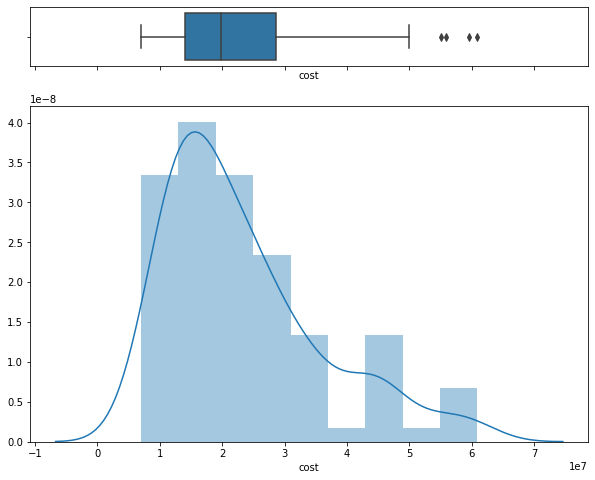

In [182]:
f, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(10, 8))

sns.boxplot(aparts["cost"], ax=ax_box2);
sns.distplot(aparts["cost"], ax=ax_hist2);

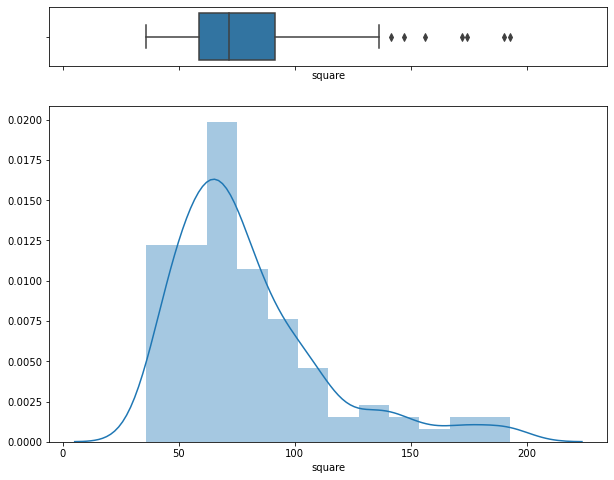

In [183]:
f, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(10, 8))

sns.boxplot(aparts["square"],  ax=ax_box2);
sns.distplot(aparts["square"], ax=ax_hist2);

100 flats have been scrapped from krisha.kz website.
From the sample of 100 apartments for sale in Atyrau, the average area is about 80 meteres squared with almost 3 rooms, with cost 23 million tenge.  While minimum are was 36 metres squared, 1 room and price was 7 million tenges of cost. Maximum values are 193 metres squared, 5 rooms, 60 million tenge cost.